## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [36]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [38]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [39]:
#answer below:
absent = absent.drop(['ID','Weight','Height','Reason for absence'],axis=1)
absent = absent.dropna()
edu = pd.get_dummies(absent['Education'])
education_list = ['high school', 'graduate', 'postgraduate', 'master and doctor']
i=0
for x in education_list:
  absent[x] = edu.iloc[:, i]
  i = i + 1
absent = absent.drop('Education',axis=1)
absent

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours,high school,graduate,postgraduate,master and doctor
0,7,3,1,289,36,13,33,239.554,97,0,2,1,0,1,30,4,1,0,0,0
1,7,3,1,118,13,18,50,239.554,97,1,1,1,0,0,31,0,1,0,0,0
2,7,4,1,179,51,18,38,239.554,97,0,0,1,0,0,31,2,1,0,0,0
3,7,5,1,279,5,14,39,239.554,97,0,2,1,1,0,24,4,1,0,0,0
4,7,5,1,289,36,13,33,239.554,97,0,2,1,0,1,30,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,7,3,1,289,36,13,33,264.604,93,0,2,1,0,1,30,8,1,0,0,0
736,7,3,1,235,11,14,37,264.604,93,0,1,0,0,1,29,4,0,0,1,0
737,0,3,1,118,14,13,40,271.219,95,0,1,1,0,8,34,0,1,0,0,0
738,0,4,2,231,35,14,39,271.219,95,0,2,1,0,2,35,0,1,0,0,0


In [40]:
from sklearn.model_selection import train_test_split,GridSearchCV
y = absent['Absenteeism time in hours']
X = absent.drop('Absenteeism time in hours', axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

Scale the independent variables using the standard scaler

In [41]:
# answer below:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)


Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [42]:
# answer below:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_scale,y_train)
print('train score: ', svr.score(X_train_scale,y_train))
print('test score: ', svr.score(X_test_scale,y_test))


train score:  0.0035654180333491996
test score:  -0.036862727928189454


If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [43]:
# answer below:
param = {'kernel':('linear','rbf','poly'),'C':[0.1,1,10]}
svr = SVR()
clf = GridSearchCV(svr,param)
clf.fit(X_train_scale,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.0154756528667219


Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

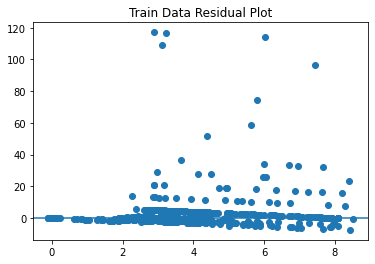

In [47]:
# answer below:
svr = SVR()     #used default on tuesday
svr.fit(X_train_scale,y_train)
residual = y_train - svr.predict(X_train_scale)
plt.scatter(svr.predict(X_train_scale),residual)
plt.title('Train Data Residual Plot')
plt.axhline(y=0)
plt.show()

Comparing to Tuesday's residual plot, this one has no point below -20 whereas the lowest value before was about -100. This plot also has bigger residual values overall. 